# Give Me Some Credit - Exploratory Analysis and Modeling
I will be looking at the Give Me Some Credit dataset on Kaggle as part of the Paidy Dataset exercise.

**Problem:** Detecting Fraud is hard. We want to be informed on how to detect fraud, better understand those who commit fraud, and figure out how to detect it with accuracy.

While this is a giant problem, I'm going to dive into one small subset of this issue with this dataset: Looking at Monthly Income.

**Background:** From looking at the features in this dataset, the feature that sticks out to me as being both interesting to look at and also one that I would be more knowledgable of is Monthly Income. I could see it being useful for predicting loan payback (people who make more will pay back their loans), but could also see it not being an important indicator (people spend more money as they make money - to a certain extent income doesn't matter). It seems interesting enough that I want to see if it matters in predicting whether someone will pay back a loan or not. 

**Hypothesis: Monthly Income matters in predicting whether someone will pay back their loan or not. Namely, the higher the income, the less likely for delinquency**

**Business Value:** 
- Understanding of where to spend resources and focus our data collection efforts.
- Marketing potential: if monthly income is significant, then this could change who we would want to market to
- Creating a model that can give us a probability of delinquency to better gauge our risk to reward for each user and determine whether to approve/take action or not.

To view notebook with option of toggling code on and off: https://nbviewer.jupyter.org/github/thealongsider/Data-Analytics-Projects/blob/master/Paidy/Paidy%20Dataset%20Exercise.ipynb

The following button toggles the code on and off:

In [366]:
#creates toggle on/off of code button
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Initial look at the Data

In [367]:
#import the libraries we need
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


In [368]:
#import data
cred = pd.read_csv('cs-training.csv',index_col = 0)

First 5 Rows in the Dataset:

In [369]:
cred.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


Basic Descriptive Statistics of each column:

In [370]:
cred.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Data types and number of rows for each column:

In [371]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


We are given the following descriptions for each feature:
- SeriousDlqin2yrs : Person experienced 90 days past due delinquency or worse
- RevolvingUtilizationOfUnsecuredLines : Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits as a percentage
- age : Age of borrower in years
- NumberOfTime30-59DaysPastDueNotWorse : Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
- DebtRatio : Monthly debt payments, alimony,living costs divided by monthy gross income as a percentage
- MonthlyIncome	: Monthly income
- NumberOfOpenCreditLinesAndLoans : Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
- NumberOfTimes90DaysLate : Number of times borrower has been 90 days or more past due.
- NumberRealEstateLoansOrLines : Number of mortgage and real estate loans including home equity lines of credit
- NumberOfTime60-89DaysPastDueNotWorse : Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
- NumberOfDependents : Number of dependents in family excluding themselves (spouse, children etc.)

Summary Information from Pandas Profiling library:

In [372]:
import pandas_profiling

In [373]:
#pandas_profiling.ProfileReport(cred)
#running normally gives us information on the correlation of variables, but the report tries to remove them automatically.
#while this information is very useful to know, I'd like to keep it in there for now. 
#Information gained: Numberoftime 30-59 days past due not worse is 0.98+ correlated with 60-89 and over 90 days late

l = list(cred.columns)
pandas_profiling.ProfileReport(cred, correlation_overrides=l)

Number of variables,12
Number of observations,150000
Total Missing (%),1.9%
Total size in memory,13.7 MiB
Average record size in memory,96.0 B
Numeric,11
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


### First Impressions:

Looks like we'll need to deal with missing values in monthly income and number of dependents. Also will want to look at the min/max values to see if they are real or outliers. Will probably want to log transform monthly income at least. Revolving and debt ratio also have crazy high maxes compared to their mean/medians so we'll want to see what is happening there as well. It seems to me that number of 90 days past due and the target variable are the same - want to look at this to see if it's needed.

# Data Cleaning


## Checking for Outliers & Anomolies

We quickly notice that there are very large max values compared to the mean/medians in RevolvingUtilizationofUnsecuredLines (afterwards referred to as RUUL) and the debt ratio. We want to examine these values and determine if we should keep them in the analysis or not. 

### Examining RUUL

Current distribution of RUUL:

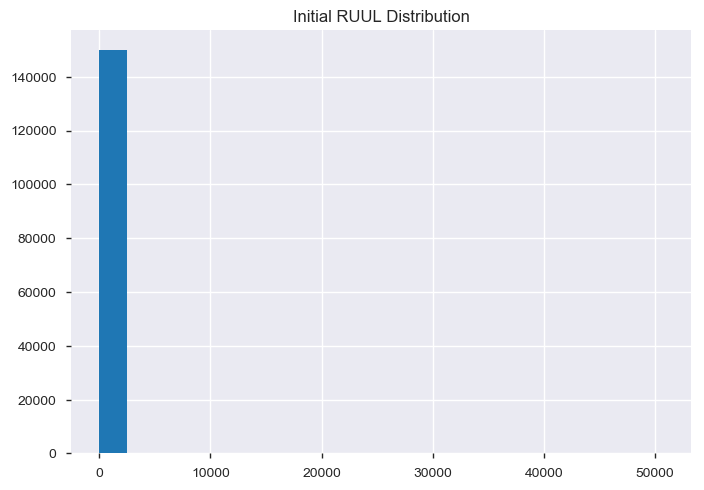

In [374]:
#create current, non-altered distribution of RUUL
plt.hist(cred['RevolvingUtilizationOfUnsecuredLines'],bins=20)
plt.title('Initial RUUL Distribution')
plt.show()

From reading the description and looking up what RUUL is online, it seems like you shouldn't have higher than a 1.00 (being 100%) because you shouldn't have a balance over your limit. We're going to seperate the data that is higher than 1.00 to send to our database admin to see what is happening. 

In [375]:
#count number of rows in the RUUL over 1 anomoly dataset
#cred[cred['RevolvingUtilizationOfUnsecuredLines']>1].count()

In [376]:
#set the dataset aside to report to/work with database admin
cred_RUULover1anomolyset=cred[cred['RevolvingUtilizationOfUnsecuredLines']>1.00]
#3321 rows
#cred_RUULover1anomolyset.to_csv(r'Path',header=True)

In [377]:
#creating new dataset based on the exclusion of anomoly data
cred_e1= cred[cred['RevolvingUtilizationOfUnsecuredLines']<=1.00]

We'll look at the distribution again after removing those values:

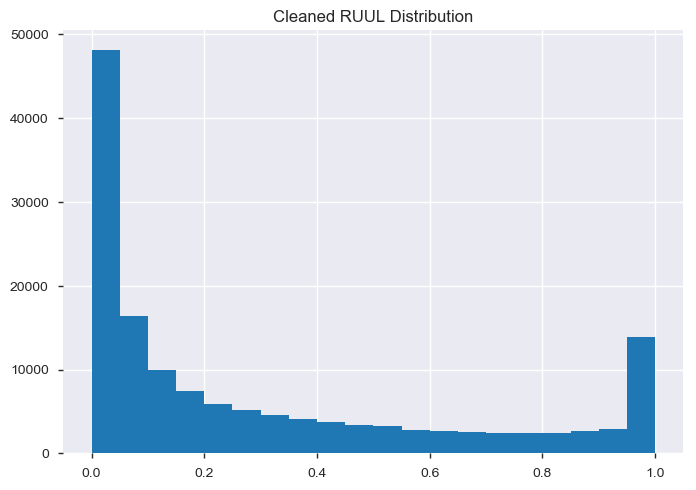

In [378]:
#plot new RUUL distribution after cleaning
plt.hist(cred_e1['RevolvingUtilizationOfUnsecuredLines'],bins=20)
plt.title('Cleaned RUUL Distribution')
plt.show()

This looks more like the distribution we would imagine seeing, mostly a binomial form, except for 1.0 at the end. Looking at the table data throughout this project, it seems like 0 and 1.0 may be the defaults, but we would want to ask the database admin what causes a 0 and a 1.0, as how these are treated would affect our analysis/model results.

### Moving on to Debt Ratio

It doesn't seem like you should be able to have an insanely high debt ratio. Without any background in this, I want to be cautious and try plotting the data first. I'll do a log transformation to better understand visually what is happening.

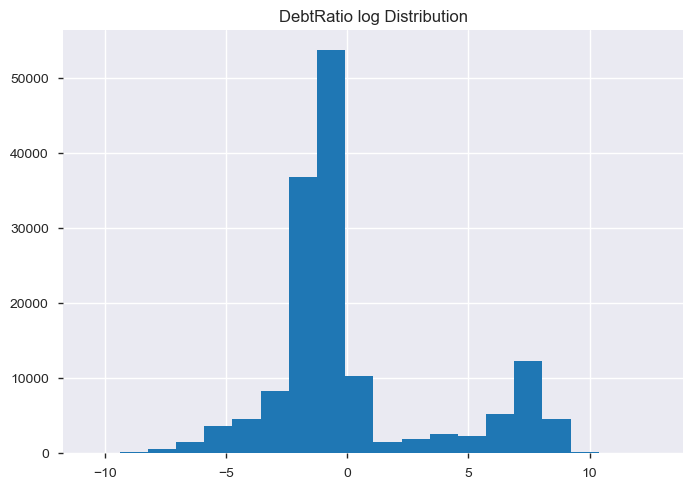

In [379]:
#plot log transformed DebtRatio distribution
plt.hist(cred['DebtRatio'].replace(0,1).apply(np.log),bins=20)
plt.title('DebtRatio log Distribution')
plt.show()

The -10 to 0 portion of this makes sense (reflecting values of nearly 0 to 1, respectively) as this reflects percentage values from 0 to 1, but there seems to be a second distribution. This actually makes me think that the shifted distribution is probably where the Monthly Income was supposed to be (as, we'll see below, the monthly income log distribution is centered right at around 7.5-8). <font color=red>Somehow in the transfer process, it looks like the data was shifted from monthly income, as this looks MUCH closer to the monthly income distribution than it is to the rest of the distribution.</font> In fact, if you see the below table, you see that, where the monthly income slots were NaN values (empty), the DebtRatio value looks almost like it belongs in the monthly income column. This seems like it could be true for the 0 and 1.0 values for the Monthly Income columns as well. Regardless, this warrents investigation with the database admin of what caused these issues.

"The 43 percent debt-to-income ratio is important because, in most cases, that is the highest ratio a borrower can have and still get a Qualified Mortgage. There are some exceptions." https://www.consumerfinance.gov/ask-cfpb/what-is-a-debt-to-income-ratio-why-is-the-43-debt-to-income-ratio-important-en-1791/

If we use this as a baseline for understanding, getting over 1 is a big problem, let alone reaching orders of magnitude greater. Therefore, anything over 100 must be ridiculous in my mind. As with the RUUL, we will remove these from our data and create a file to be sent to the data admin. 

First 10 rows of debt ratio higher than 100:

In [380]:
#DebtRatio over 100 filtered table
cred[cred['DebtRatio']>100].head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
7,0,0.305682,57,0,5710.0,NaN,8,0,3,0,0.0
15,0,0.019657,76,0,477.0,0.0,6,0,1,0,0.0
17,0,0.061086,78,0,2058.0,NaN,10,0,2,0,0.0
33,0,0.083418,62,0,977.0,NaN,6,0,1,0,0.0
45,0,0.368876,68,0,1687.5,1.0,31,0,1,0,0.0
51,0,0.818978,73,0,3095.0,0.0,9,0,1,1,0.0
59,0,0.541109,43,0,2477.0,NaN,3,0,1,0,2.0
63,0,0.101156,72,0,1720.0,NaN,12,0,2,0,0.0
72,0,0.142013,67,0,1824.0,NaN,7,0,2,0,0.0
74,0,0.059669,31,0,3162.0,0.0,11,0,2,0,1.0


Number of rows for each feature with a Non-null value for Debt Ratios higher than 100:

In [381]:
#count number of rows in DebtRatio over 100 anomoly dataset
cred[cred['DebtRatio']>100].count()

SeriousDlqin2yrs                        24380
RevolvingUtilizationOfUnsecuredLines    24380
age                                     24380
NumberOfTime30-59DaysPastDueNotWorse    24380
DebtRatio                               24380
MonthlyIncome                            1687
NumberOfOpenCreditLinesAndLoans         24380
NumberOfTimes90DaysLate                 24380
NumberRealEstateLoansOrLines            24380
NumberOfTime60-89DaysPastDueNotWorse    24380
NumberOfDependents                      22061
dtype: int64

Even seeing this count with a very low amount of data in the monthly income feature shows that something happened that coincided with potentially a shift in data from monthly income to debt ratio.

Note that, when we report this data, we are using our original dataset and not the version we just made that removed RUUL anomolies so that we do not miss over issues that could be overlapping within both anomoly datasets. We want to treat them as individual errors, even if they may be related. This approach is used throughout the rest of this data cleaning process.

In [382]:
#set the dataset aside to report to/work with database admin
cred_DebtRatioover100anomolyset=cred[cred['DebtRatio']>100]
#24380 rows
#cred_DebtRatioover100anomolyset.to_csv(r'Path',header=True)

In [383]:
#creating new dataset based on the exclusion of anomoly data including previously excluded data
cred_e2= cred_e1[cred_e1['DebtRatio']<=100]

### While we're here: Monthly Income 0 vs. 1.0

First ten rows of users with monthly income less than 10

In [384]:
#create first ten rows of monthly income less than 10
cred[cred['MonthlyIncome']<10].head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
15,0,0.019657,76,0,477.0,0.0,6,0,1,0,0.0
45,0,0.368876,68,0,1687.5,1.0,31,0,1,0,0.0
51,0,0.818978,73,0,3095.0,0.0,9,0,1,1,0.0
74,0,0.059669,31,0,3162.0,0.0,11,0,2,0,1.0
91,0,0.039388,51,0,15466.0,0.0,7,0,0,0,0.0
168,0,0.020966,29,0,639.5,1.0,3,0,1,0,2.0
196,1,0.025892,38,0,74.5,1.0,13,0,0,0,2.0
218,0,0.222696,42,0,800.0,1.0,3,0,1,0,2.0
299,0,0.085152,25,0,1005.0,0.0,5,0,0,0,0.0
327,0,0.013115,43,0,4211.0,0.0,21,0,2,0,2.0


As mentioned above, I want to highlight the difference between 0 and 1 in the monthly income columns. <font color=red> As this is practically an insignificant absolute difference in value, it would be worth investigating what the significance may mean for how the database was set up. </font> Is this a value that seperates people based on how the data was received into the system? Why was this not considered NaN instead for the 1.0 values, assuming the 0 values are true values (which they very well may not be, which is also worth asking about)

### Finally, let's look at the Number of Times 90 days Late:

First 10 rows with Number Of Times 90 Days Late values greater than 90:

In [385]:
#create table of rows where number of times 90 days late is less than 90
cred[cred['NumberOfTimes90DaysLate']>90].head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1734,1,1.0,27,98,0.0,2700.0,0,98,0,98,0.0
2287,0,1.0,22,98,0.0,NaN,0,98,0,98,0.0
3885,0,1.0,38,98,12.0,NaN,0,98,0,98,0.0
4418,0,1.0,21,98,0.0,0.0,0,98,0,98,0.0
4706,0,1.0,21,98,0.0,2000.0,0,98,0,98,0.0
5074,0,1.0,33,98,0.0,1500.0,0,98,0,98,0.0
6281,1,1.0,51,98,0.0,7500.0,0,98,0,98,0.0
7033,1,1.0,29,98,0.0,1647.0,0,98,0,98,0.0
7118,1,1.0,25,98,21.0,NaN,0,98,0,98,NaN
7688,1,1.0,21,98,0.0,NaN,0,98,0,98,0.0


In [386]:
#count number of rows that are a part of the 98 anomoly set
#cred[cred['NumberOfTimes90DaysLate']>90].count()

<font color=red>It seems like 98 is a place holder of some kind.</font> I'm not sure what's going on here, but it looks like it could be an error of some kind or an intentional "shelving" of the data for later investigation, especially because most of the respective RUUL rates are 1.00 with a debt ratio of 0. It's good to keep track of this in some way, but I wonder if this is the best way to capture what the database admin was trying to capture in these rows. I will want to remove them and set aside for investigation.

In [387]:
#set the dataset aside to report to/work with database admin
cred_98anomolyset=cred[cred['NumberOfTimes90DaysLate']>90]
#269 rows
#cred_98anomolyset.to_csv(r'Path',header=True)

Focusing on the NumberOfTimes90DaysLate (and alternatively the 30-59 and 60-89), we want to reexamine the max values to make sure they are acceptable.

Max Values of rows for each feature with Number of Times 90 Days late less than 90:

In [388]:
#want to make sure I filter higher than the true max in the dataset
cred[cred['NumberOfTimes90DaysLate']<90].max()

SeriousDlqin2yrs                              1.0
RevolvingUtilizationOfUnsecuredLines      50708.0
age                                         109.0
NumberOfTime30-59DaysPastDueNotWorse         13.0
DebtRatio                                329664.0
MonthlyIncome                           3008750.0
NumberOfOpenCreditLinesAndLoans              58.0
NumberOfTimes90DaysLate                      17.0
NumberRealEstateLoansOrLines                 54.0
NumberOfTime60-89DaysPastDueNotWorse         11.0
NumberOfDependents                           20.0
dtype: float64

<font color=red>Even after accounting for the 98 placeholder data, the max that appears on the NumberOfTimes90DaysLate is 17, when, in reality, you can only do this 8 times (9 depending on how they count it) in a two year period.</font> So, we will need to seperate this data as well for investigation.

In [389]:
#count number of rows that are a part of the Num90Days over 9 anomoly set
#cred[(cred['NumberOfTimes90DaysLate']<90) & (cred['NumberOfTimes90DaysLate']>9)].count()

In [390]:
#set the dataset aside to report to/work with database admin
cred_Num90Daysover9anomolyset=cred[(cred['NumberOfTimes90DaysLate']<90) & (cred['NumberOfTimes90DaysLate']>9)]
#24 rows
#cred_Num90Daysover9anomolyset.to_csv(r'Path',header=True)

In [391]:
#creating new dataset based on the exclusion of anomoly data including previously excluded data
cred_e3= cred_e2[cred_e2['NumberOfTimes90DaysLate']<=9]

I'm also curious: It seems like NumberOfTime90DaysLate and being in serious delinquency in 2 years are very similar. It seems like if you have more than 0 for NumberOfTime90DaysLate, then you would also be in serious delinquency. I want to confirm this. 

First 10 rows for filtering dataset with both NumberOfTimes90DaysLate is greater than 0 and they are NOT in delinquency:

In [392]:
#creating filtered table of number of times 90 days late greater than 0 and were not serious delinquency
cred[(cred['NumberOfTimes90DaysLate']>0) & (cred['SeriousDlqin2yrs']==0)].head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
50,0,0.000080,70,0,0.256340,6900.0,21,1,1,0,0.0
69,0,0.004264,31,0,0.111444,2000.0,6,1,0,0,2.0
73,0,0.827708,56,0,0.369591,6793.0,15,1,1,0,0.0
96,0,0.245353,37,0,0.288417,6500.0,11,1,1,1,0.0
177,0,1.000000,69,0,0.005319,2255.0,0,1,0,0,3.0
183,0,0.676195,55,0,0.436666,3970.0,10,1,1,0,0.0
192,0,1.095083,53,5,0.536704,3500.0,7,1,1,2,0.0
212,0,1.000000,66,1,0.358101,1937.0,4,1,0,0,0.0
287,0,1.000000,47,0,0.092163,9493.0,2,2,0,1,0.0


It's clear that this was worth looking into. <font color=red>I could be wrong, but, based on how they defined the features and target variable, I feel confident that there was some sort of error in data collection/identification and this should be investigated.</font> I will seperate this from the data as well. 

In [393]:
#count number of rows that are a part of the Serious Dlq and Num Of 90 Days dataset
#cred[(cred['NumberOfTimes90DaysLate']>0) & (cred['SeriousDlqin2yrs']==0)].count()

In [394]:
#set the dataset aside to report to/work with database admin
cred_SeriousDlqandNumOf90Daysanomolyset=cred[(cred['NumberOfTimes90DaysLate']>0) & (cred['SeriousDlqin2yrs']==0)]
#4866 rows
#cred_SeriousDlqandNumOf90Daysanomolyset.to_csv(r'Path',header=True)

In [395]:
#creating new dataset based on the exclusion of anomoly data including previously excluded data
cred_e4= cred_e3[~((cred_e3['NumberOfTimes90DaysLate']>0) & (cred_e3['SeriousDlqin2yrs']==0))]

Because we made the above assumption, the assumption goes the other way as well. If a user is serious delinquency in 2 years, then that must mean there is at least 1 time where they are 90 days or more late. I attempted to create this change, but, after coming back through the analysis, realized we would drop the number of times 90 days late column anyways for our model, so I chose not to. In this way, the assumption is that we trust the target variable data over the number of times 90 days or late data.

First 5 rows of the data with anomolies removed:

In [396]:
cred_e4.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0


In the process of cleaning this data, I have opted to drop much of it from our analysis because I do not know the context in which it was collected. In general, I'm opting for higher quality data over quantity of data, and would choose to have less data that is higher quality than more data that may contain noise. 

## Handling Missing Data

After careful consideration, I've decided to fill in the number of dependent NaNs with the median (which happens to be 0) and dropping all records with a NaN for monthly income. Alternatively, I could fill the Monthly Income empty rows with the median, but, without knowing much about how this variable will affect the investigation (and assuming there is a high impact of monthly income on whether someone pays back their loan or not), it seemed better to drop it entirely so we can compare all of the information equally without assumption, especially visually. 

<font color=red>I also want to ask/figure out why there are so many empty missing data points for monthly income while the majority of the other features don't have missing data.</font> This alone is worth investigating, especially if our hypothesis that it's an important indicator of paying off the loan actually holds.

Imputing median values for Number of dependents and checking through error:

In [397]:
#imputing number of dependents feature with its median
cred_e4['NumberOfDependents']=cred_e4['NumberOfDependents'].fillna(cred_e4['NumberOfDependents'].median())

C:\Users\Brandon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [398]:
#checking through the warning.
cred_e4[cred_e4['NumberOfDependents'].isnull()]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents


Number of Missing values for Monthly Income for target variable:

In [399]:
#Finding number of missing values for Monthly Income when our target variable is 1
cred_e4[cred_e4['MonthlyIncome'].isnull()]['SeriousDlqin2yrs'].value_counts()

0    6404
1     246
Name: SeriousDlqin2yrs, dtype: int64

This is a slightly lower in proportion (\~4%) of defaulters to not that is in the whole original dataset (\~7%), so, while not ideal to drop the data, I don't think we'll be losing affecting our target variable enough to cause problems to the model, especially with the number of rows we're dropping.

In [400]:
#count number of rows that are a part of the Missing monthly income dataset dataset
#cred[cred['MonthlyIncome'].isnull()].count()

In [401]:
#set the dataset aside to report to/work with database admin
cred_missingMonthlyIncomeset=cred[cred['MonthlyIncome'].isnull()]
#29731 rows
#cred_missingmonthlyincomeset.to_csv(r'Path',header=True)

In [402]:
#dropping all remaining NaN values (all found in the monthly income column) from the cleaned data thus far
cred_e5=cred_e4.dropna()

Remaining data count:

In [403]:
#verifying no missing values
cred_e5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112185 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        112185 non-null int64
RevolvingUtilizationOfUnsecuredLines    112185 non-null float64
age                                     112185 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    112185 non-null int64
DebtRatio                               112185 non-null float64
MonthlyIncome                           112185 non-null float64
NumberOfOpenCreditLinesAndLoans         112185 non-null int64
NumberOfTimes90DaysLate                 112185 non-null int64
NumberRealEstateLoansOrLines            112185 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    112185 non-null int64
NumberOfDependents                      112185 non-null float64
dtypes: float64(4), int64(7)
memory usage: 10.3 MB


Overall, we ended up dropping nearly 1/3 of our dataset due to "bad" data. Although still not ideal, I would much rather have confidence in the data we have left then have a lot of bad quality data in our analysis. 

# Exploratory Data Analysis

To get a general understanding of how the variables interact with each other, we'll be taking out our microscope and looking at a pairplot of the data:

In [404]:
#pandas profiling again to see each feature after we've cleaned the data
l = list(cred_e5.columns)
pandas_profiling.ProfileReport(cred_e5, correlation_overrides=l)

Number of variables,12
Number of observations,112185
Total Missing (%),0.0%
Total size in memory,10.3 MiB
Average record size in memory,96.0 B
Numeric,11
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [405]:
#pairplot to help get general understanding of the data
#sns.pairplot(cred_e5)

The distributions look more understandable and "normal" in a sense, so we'll begin looking at things in terms of monthly income to begin seeing if our hypothesis holds true.

Text(0.5,1,'Monthly Income')

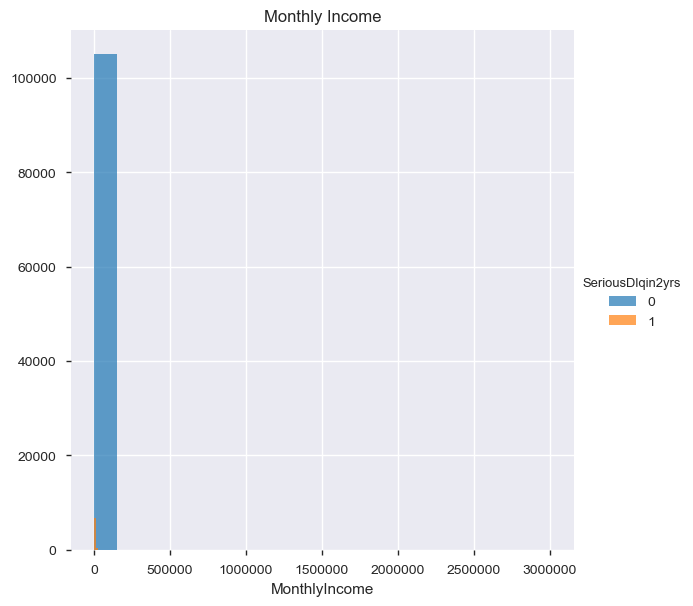

In [406]:
#plotting monthly income distribution
g = sns.FacetGrid(cred_e5,hue='SeriousDlqin2yrs',height=6)
g = (g.map(plt.hist,'MonthlyIncome', alpha=0.7, bins=20)).add_legend()
axes = g.axes.flatten()
axes[0].set_title('Monthly Income')

It seems clear that we'll need to log transform the monthly income in order to be able to visualize the data and get anything from it. 

In [407]:
#need to convert monthly income of 0 to 1 for the log transformation.
cred_e5['MonthlyIncome']=cred_e5['MonthlyIncome'].replace(0,1)

C:\Users\Brandon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [408]:
#apply log transformation
cred_e5['MonthlyIncomelog']=cred_e5['MonthlyIncome'].apply(np.log)

C:\Users\Brandon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,1,'Monthly Income Log Distribution')

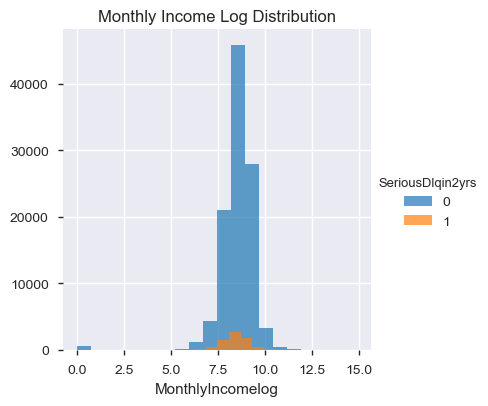

In [409]:
#Monthly Income log distribution plotting
g = sns.FacetGrid(cred_e5,hue='SeriousDlqin2yrs',height=4)
g = (g.map(plt.hist,'MonthlyIncomelog', alpha=0.7, bins=20)).add_legend()
axes = g.axes.flatten()
axes[0].set_title('Monthly Income Log Distribution')

Because these distributions overlap, we can't say that they are significantly different visually. This leads me to think that differences in monthly income isn't a significant factor into whether someone pays back their loan or not. If we zoom in on the target variable itself, we'll see the distribution to be the case. For reference, 6 on the graph is about 400 monthly income and a 12 would be 200,000.

Text(0.5,1,'Serious Delinquency in 2 years Distribution')

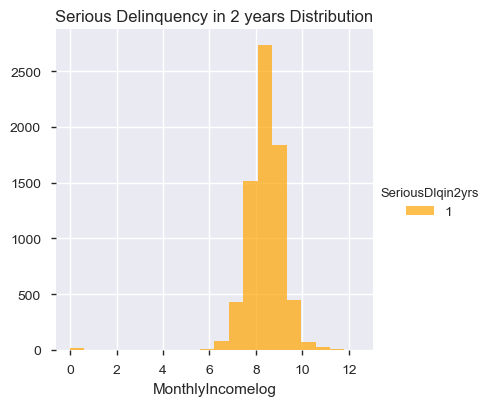

In [410]:
#distribution plot of delinquancy log transformation
g = sns.FacetGrid(cred_e5[cred_e5['SeriousDlqin2yrs']==1],hue='SeriousDlqin2yrs',height=4)
g = (g.map(plt.hist,'MonthlyIncomelog', alpha=0.7, bins=20,color='orange')).add_legend()
axes = g.axes.flatten()
axes[0].set_title('Serious Delinquency in 2 years Distribution')

To visualize this a little further, we'll visualize monthly income against something that we assume is fairly distributed like age. 

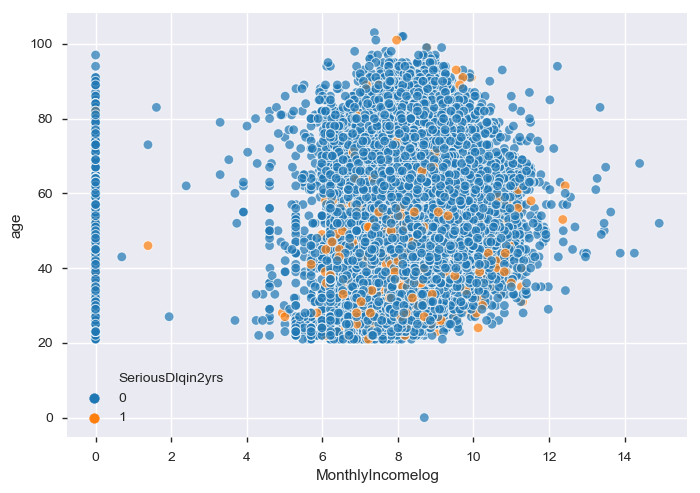

In [411]:
sns.scatterplot(data=cred_e5,x='MonthlyIncomelog',y='age', hue='SeriousDlqin2yrs',alpha = 0.7)

We see that, as far as the x axis goes, there really isn't a clear difference between people who are on the high or low end of monthly income. We also notice that one datapoint has an age of near zero. We would like to investigate this as well, but mostly assume that it's a mistake and should be removed from the analysis.

I want to visualize Monthly Income with a variable we haven't looked into yet, Number of estate loans/lines.

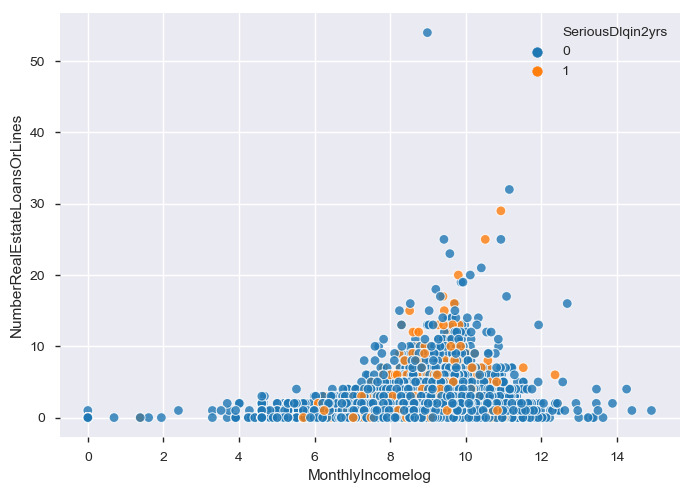

In [412]:
#plot number of real estate loans/lines vs monthly income log
sns.scatterplot(data=cred_e5,x='MonthlyIncomelog',y='NumberRealEstateLoansOrLines', hue='SeriousDlqin2yrs',alpha=0.8)

Again, we see a similar horizontal distribution with our Monthly Income data. 

I would like to make a quick logistic regression model to see how our cleaned data can predict future loan delinquency. I also want to use the model to confirm that Monthly Income indeed doesn't have as large of an impact.

# Model Training and Evaluation
We're going to use a logistic regression model because it's great when using a yes/no target variable (along with handling inbalanced data), allows you to understand the probability of default for each predicted user, and will allow us to derive the odds ratio to have a better understanding of how to compare the features to one another.

In [413]:
#removing monthly income (not the log transformation version)
#also removing Numberoftimes90DaysLate because, in my interpretation of the data, it's the same as target variable.
X1 = cred_e5.drop(['SeriousDlqin2yrs','MonthlyIncome','NumberOfTimes90DaysLate'],axis=1)
#X1.head()

In [414]:
y1 = cred_e5['SeriousDlqin2yrs']

In [415]:
from sklearn.model_selection import train_test_split

In [416]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=101)

In [417]:
from sklearn.linear_model import LogisticRegression

In [418]:
logmodel1 = LogisticRegression(solver = 'lbfgs', max_iter=300)

In [419]:
logmodel1.fit(X1_train,y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=300, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [420]:
predict1=logmodel1.predict(X1_test)

In [421]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y1_test,predict1))
print(classification_report(y1_test,predict1))

[[31346   167]
 [ 1882   261]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     31513
           1       0.61      0.12      0.20      2143

   micro avg       0.94      0.94      0.94     33656
   macro avg       0.78      0.56      0.59     33656
weighted avg       0.92      0.94      0.92     33656



This essentially tells us that our model that our overall model accuracy is 93.5%, which is only slightly better than a "dumb" model that will simply say that every person will not enter delinquency and that model will hit 93% according to our data. Considering this was an initial simple model, it's at least not worse off, which is a good sign. The desire would be, in this instance, to minimize false positives so that we can manage risk and capital better. 

What we mostly care about in this instance, however, is what the logistic regression model coefficients can tell us. We'll create a report to examine these features:

In [422]:
#function that creates Coefficient report for logistic regression using statsmodel
def Coefsum(X,y):
    """ Provides a logistic regression summary analysis for each variable"""
    import statsmodels.api as sm
    logit_model=sm.Logit(y,X)
    result = logit_model.fit()
    print(result.summary2())

In [423]:
#create coefficient report for Logistic regression using statsmodel
Coefsum(X1,y1)

Optimization terminated successfully.
         Current function value: 0.190781
         Iterations 8
                                   Results: Logit
Model:                      Logit                  Pseudo R-squared:       0.197     
Dependent Variable:         SeriousDlqin2yrs       AIC:                    42823.6020
Date:                       2019-08-27 21:27       BIC:                    42910.2531
No. Observations:           112185                 Log-Likelihood:         -21403.   
Df Model:                   8                      LL-Null:                -26660.   
Df Residuals:               112176                 LLR p-value:            0.0000    
Converged:                  1.0000                 Scale:                  1.0000    
No. Iterations:             8.0000                                                   
-------------------------------------------------------------------------------------
                                      Coef.  Std.Err.    z     P>|z|   [0.

From the above report, we can't understand the magnitude of the change in one of these variables as it affects the chance of the target variable, but we can interpet the sign. So, we can see that the monthly income does trend towards having less of a chance of delinquency as monthly income increases. However, we can't interpret the amount, and, regardless of how significant the impact is, every feature will have a sign. 

To compare the relative impacts, we'll look at the odds ratio. It's essentially derived from probability to understand comparisons between variables (similar to horse races when they say something has a 7:1 chance or something similar). It's important to note that odds ratio is used for relative risk, and not for a magnitude of probability (the model itself can create a probability for us for each user). 

In [424]:
#X1.columns

In [425]:
#calculating odds ratio from our logistic model
Oddsratio = pd.DataFrame(np.exp(logmodel1.coef_),columns=['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents',
       'MonthlyIncomelog'])

Odds Ratio:

In [426]:
Oddsratio

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MonthlyIncomelog
0,8.616763,0.985329,1.744447,0.984897,1.014116,1.093792,2.95947,1.068584,0.869859


**Odds Ratio**

- RevolvingUtilizationOfUnsecuredLines: <font color=red>8.616763</font>
- age: 0.985329
- NumberOfTime30-59DaysPastDueNotWorse: <font color=red>1.744447</font>
- DebtRatio: 0.984897
- NumberOfOpenCreditLinesAndLoans: 1.014116
- NumberRealEstateLoansOrLines: 1.093792
- NumberOfTime60-89DaysPastDueNotWorse: <font color=red>2.95947</font>
- NumberOfDependents: 1.068584
- MonthlyIncomelog: 0.869859

Generally, an odds ratio between 0.8 and 1.2 doesn't impact the target variable as much with an increase in the feature. So, features like age, DebtRatio, and Number of credit lines and loans don't have that much of an affect. We can see that the Monthly Income, while it's on the border of that general rule of thumb, still isn't enough of an indicator to put much emphasis on this when collecting our data and using it to predict whether someone will go into loan delinquency. 

However, we do see that Number of time 30-59 days past due and 60-89 days past due are above that threshold. That means people who have a 30-59 days past due value are 1.7x as likely to enter delinquency and people with 60-89 days past due are almost 3x as likely to enter delinquency. This seem rather intuitive, as the longer it takes you to pay, the easier to is to wait even longer, even if it's an accident. However, having a higher RUUL gives you 8.6 times as likely to enter delinquency. Although this is a great find and good to know, we want to be cautious with this number until we can decipher our questions between the default rating of RUUL in our dataset. Only after confirming this information would we want to take actions based on this data, but, even so, it's still rather reasonable that, although it wouldn't be as high of an odds ratio, it will still have a rather large impact. 

# Conclusion and Recommendations
So what does this all mean? What are the results for what we set out to do? 

First, we looked through the data and found many instances of potentially questionable data. Given my limited background in loan-related terms, there is a sense of caution as I made assumptions throughout this analysis. However, bringing all of these issues that we discovered in the data to a database admin can help raise the quality of data for analysis and help streamline the data collection process by identifying potential problem areas. My opinion is that priority should be made on better quality data over quantity data, as you will be able to make better and more confident decisions knowing the data is better quality.

Second, we hypothesized that monthly income had a large effect on whether a user entered delinquency or not. Through visually examining the data and viewing the log transformed distributions together (along with some other plots) we couldn't say that there was a real difference in the data. After creating a logistic regression model, we found that, while increasing monthly income very slightly reduced your odds of delinquency, it wasn't enough to warrent any significant attention to monthly income. This means that, as we think about collecting monthly income data, we shouldn't spend large resources on getting this data. While another feature can be helpful, there could be other features that might be more predictive of delinquency that resources should be spent on. This also means that, for marketing purposes, marketing heavily towards higher income users would likely not decrease the chance of delinquency. Instead, we should look towards other ways of quantifying potential causes of delinquency, using our model results as a guide.

Third, through our model results, we found potential areas that we should focus in if we want to be better at predicting loan delinquency. Namely, paying late (past 30 days) and the RUUL. In paying late, we could look at what causes users to pay late (but not to delinquency level). If we can quantify some of these properties, we may be able to create indicators that could warn us whether a user could become someone who will enter credit delinquency in the future. For the RUUL, we want to make sure we get that information as detailed with as much quality as possible, as this is one of the biggest indicators, according to our model, of credit delinquency. Also through our model, we can create delinquency probabilities for each user and then set a threshold for ourselves based on the business impact of a delinquency (example: above 70% risk, then we say no due to the potential cost of the delinquency)

# Further work
- I would have liked to run the test data against my model. Although this is a very normal thing to do, due to time constraints, I chose not to prioritize this, as my goal wasn't to create the perfect model, but to create a model that is good enough to draw insights from.
- I would like to look deeper into the number of days late features to see if there is something discoverable there
- Feature engineering - there is always more feature engineering that could be done to increase predictive power

In [427]:
# APPENDIX CODE
#The following is code that could be used to further evaluate the model. 
#For the purposes of this presentation, I chose not to include it in the main body but wanted to have it on hand.

In [428]:
#The following functions create evaluation metrics and graphs for the model. 
#These are best used contextualized and in comparison with other model performance within the problem set
"""
def ROCAUC(xtest,ytest,modelname):
    '''Draws the ROC curve and calculates AUC'''
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    probs = modelname.predict_proba(xtest)
    #want only the probabilities for the positive outcome only
    probs=probs[:,1] 
    auc = roc_auc_score(ytest, probs)
    print('AUC: %.3f' %auc)
    #roc curve
    fpr,tpr,thresholds = roc_curve(ytest, probs)
    #plot the no skill 50/50 guess
    _ = plt.plot([0,1],[0,1],linestyle='--')
    #plot the roc curver for the model
    _ = plt.plot(fpr,tpr,marker = '.')
    _ = plt.xlabel('False Positive Rate')
    _ = plt.ylabel('True Positive Rate')
    _ = plt.title('Receiver operating characteristic')
    plt.show()

def Prerec(xtest,ytest,modelname, predictions):
    '''Draws the Precision-recall curve and prints f1,auc, and ap'''
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import f1_score
    from sklearn.metrics import auc
    from sklearn.metrics import average_precision_score
    probs = modelname.predict_proba(xtest)
    #want only the probabilities for the positive outcome only
    probs=probs[:,1] 
    precision, recall, threshlds = precision_recall_curve(ytest, probs)
    f1 = f1_score(ytest,predictions)
    auc = auc(recall, precision)
    #ap stands for average precision score
    ap = average_precision_score(ytest, probs)
    print('f1=%.3f auc = %.3f ap = %.3f' % (f1,auc,ap))
    _ = plt.plot([0,1],[0.5,0.5],linestyle = '--')
    _ = plt.plot(recall, precision, marker ='.')
    plt.show()

#CAP curve
def CAP(xtest, ytest, modelname):
    ''' Calculates the Cumulitive Accuracy Profile (CAP) curve'''
    from sklearn.metrics import auc
    
    total = len(ytest)
    class_1_count = np.sum(ytest)
    class_0_count = total - class_1_count
    plt.figure(figsize = (10,5))
    
    #First plot a random model
    _ = plt.plot([0,total],[0,class_1_count],c='r',linestyle='--',label='Random Model')
    #Plot Perfect model
    _ = plt.plot([0,class_1_count,total],[0,class_1_count,class_1_count],c='grey',linewidth=2,label='Perfect Model')
    #Now to add our model
    probs = modelname.predict_proba(xtest)
    #want only the probabilities for the positive outcome only
    probs=probs[:,1] 
    model_y = [y for _, y in sorted(zip(probs, ytest), reverse = True)]
    y_values = np.append([0], np.cumsum(model_y))
    x_values = np.arange(0, total + 1)
    _ = plt.plot(x_values,y_values,c='b',label='Predictive Model',linewidth=4)
    
    #50% mark line 
    index = int((50*total / 100))
    ## 50% Vertical line from x-axis
    plt.plot([index, index], [0, y_values[index]], c ='g', linestyle = '--')
    
    ## Horizontal line to y-axis from prediction model
    plt.plot([0, index], [y_values[index], y_values[index]], c = 'g', linestyle = '--')
    
    class_1_observed = y_values[index] * 100 / max(y_values)
    print("Percentage of Total Positive Outcomes at 50%: {}%".format(class_1_observed))
    
    #auc
    # Area under Random Model
    a = auc([0, total], [0, class_1_count])
    
    # Area between Perfect and Random Model
    aP = auc([0, class_1_count, total], [0, class_1_count, class_1_count]) - a
    
    # Area between Trained and Random Model
    aR = auc(x_values, y_values) - a

    print("Accuracy Ratio: {}".format(aR / aP*100))
    
    _ = plt.xlabel('Users Tested')
    _ = plt.ylabel('Clicked on Ad')
    _ = plt.title('Cumulative Accuracy Profile')   
    _ = plt.legend()
    
    plt.show()

"""
#Precision-Recall curve
##Prerec(X1_test,y1_test,logmodel1,predict1)

#ROC AUC curve
##ROCAUC(X1_test,y1_test,logmodel1)
### (this model) auc of 83%

#CAP curve
##CAP(X1_test,y1_test,logmodel1)
### (this model) 91% of cumulative target variable predicted at 50% total users
;

''